In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score

In [17]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [18]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [4]:
df = pd.read_csv("C:\\Users\\adria\\Downloads\\datamachine\\datasets\\datasets\\creditcard.csv")

In [5]:
df.head(40)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
print("Número de características:", len(df.columns))
print("Longitud del conjunto de datos:", len(df))

Número de características: 31
Longitud del conjunto de datos: 284807


In [7]:
# 492 transacciones fraudulentas, 284315 transacciones legitimas
# El conjunto de datos se encuntra desequilabrado
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# Visualizamos los tipos de cada uno de los atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Comprobamos si alguna columna tiene valores nulos
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


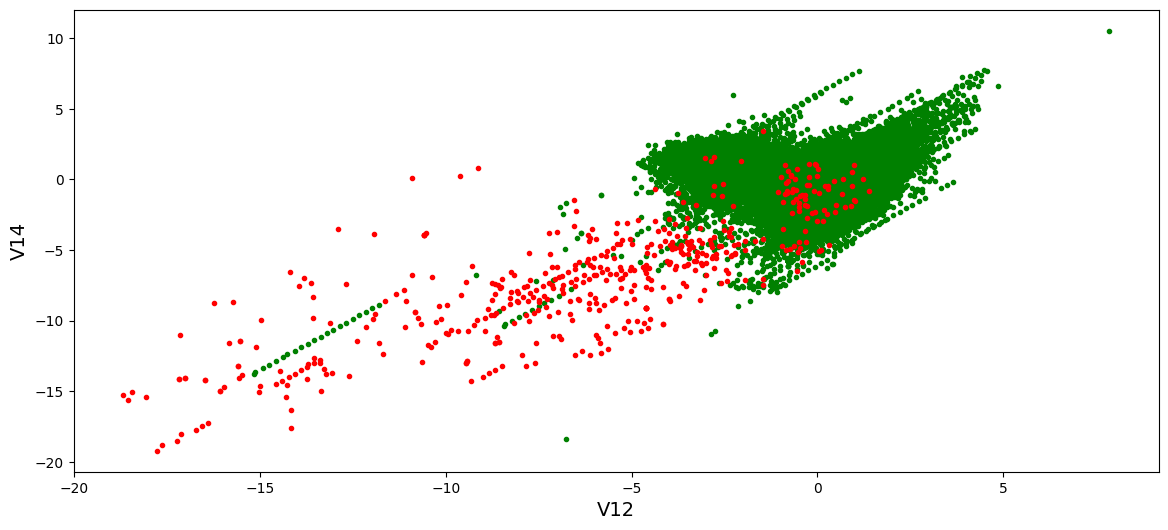

In [11]:
# Representación gráfica de dos características
plt.figure(figsize=(14, 6))
plt.scatter(df["V12"][df['Class'] == 0], df["V14"][df['Class'] == 0], c="g", marker=".")
plt.scatter(df["V12"][df['Class'] == 1], df["V14"][df['Class'] == 1], c="r", marker=".")
plt.xlabel("V12", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

In [12]:
#Preparación del conjunto de datos
df = df.drop(["Time", "Amount"], axis=1)

In [14]:
# Dividimos el conjunto de datos
train_set, val_set, test_set = train_val_test_split(df)

In [21]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

In [22]:
#Redes Neuronales Artificiales con un conjunto de datos de dos dimensiones
X_train_reduced = X_train[["V12", "V14"]].copy()
X_val_reduced = X_val[["V12", "V14"]].copy()
X_test_reduced = X_test[["V12", "V14"]].copy()

In [23]:
X_train_reduced

,V12,V14
164406,-0.589246,-0.115675
220383,-0.440400,-0.505054
49922,-0.361721,-0.439746
181642,-0.035721,0.565399
210715,0.355078,-0.433966
...,...,...
119879,0.777009,0.600937
259178,0.346437,0.384625
131932,0.022804,-0.019493
146867,0.570400,0.927786


In [24]:
# Instalamos tensorflow
!pip install tensorflow
!pip install keras

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB 1.4 MB/s eta 0:00:01
     -------------------------- ------------- 30.7/46.2 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 287.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB 495.5 kB/s eta 0:12:41
   ---------------------------------------- 0.1/377.0 MB 563.7 kB/s eta 0:11:09
   ---------------------------------------- 0.1/377.0 MB 656.4 kB/s eta 0:09:35
   ---------------------------------------- 0.1/377.0 MB 655.8 kB/s eta 0:09:35
   ---------------------------------------- 0.2/377.0 MB 655.4 kB/s eta 0:09:35
   ---------------------------------------- 0.2/377.0 MB 655.9 kB/s eta 0:09:35
   ---------------------------------------- 0.2/377.0 MB 655.6 kB/

In [25]:
# Definición de la arquitectura de la red neuronal
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train_reduced.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

C:\Users\adria\anaconda3\envs\datau\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Resumen de las capas del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Entrenamos el modelo
history = model.fit(X_train_reduced,
                   y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(X_val_reduced, y_val))

Epoch 1/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9888 - loss: 0.1069 - val_acc: 0.9992 - val_loss: 0.0042
Epoch 2/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9993 - loss: 0.0039 - val_acc: 0.9992 - val_loss: 0.0039
Epoch 3/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9993 - loss: 0.0038 - val_acc: 0.9992 - val_loss: 0.0039
Epoch 4/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9992 - loss: 0.0035 - val_acc: 0.9992 - val_loss: 0.0037
Epoch 5/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9992 - loss: 0.0041 - val_acc: 0.9991 - val_loss: 0.0040
Epoch 6/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9992 - loss: 0.0041 - val_acc: 0.9992 - val_loss: 0.0037
Epoch 7/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9992 - loss: 0.0042 - val_acc: 0.9992 - val_loss: 0.0037
Epoch 8/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9993 - loss: 0.0033 - val_acc: 0.9992 - val_loss: 0.0038
Epoch 9/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - ac

In [28]:
def plot_ann_decision_boundary(X, y, model, steps=1000):
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = labels.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)

In [29]:
# Predicción con el conjunto de datos de entrenamiento
pred = model.predict(X_train_reduced) 
y_pred = (pred > 0.5).astype("int32")

5341/5341 ━━━━━━━━━━━━━━━━━━━━ 3s 578us/step


31250/31250 ━━━━━━━━━━━━━━━━━━━━ 18s 566us/step


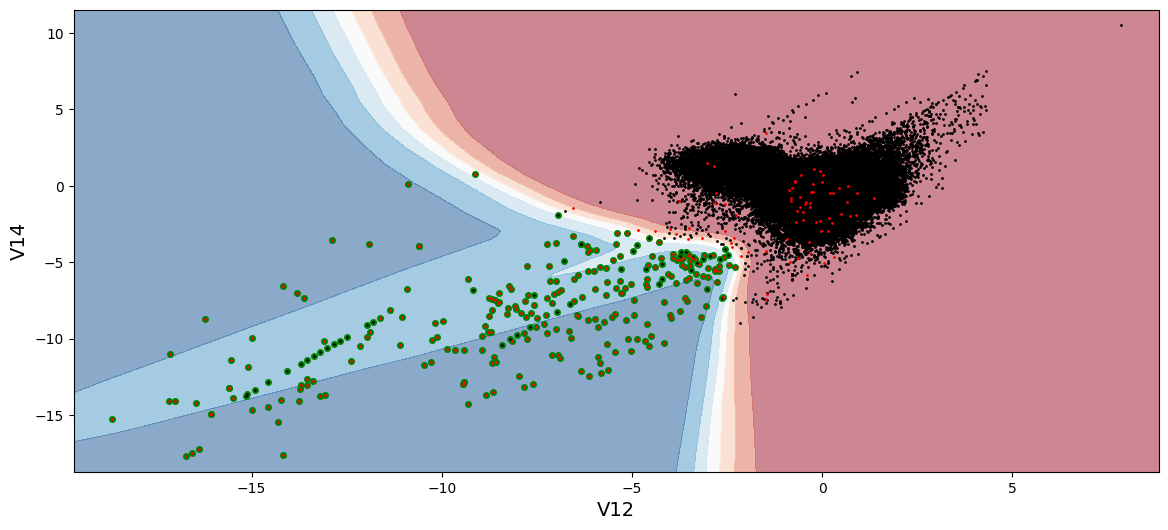

In [31]:
plt.figure(figsize=(14, 6))
plt.plot(X_train_reduced[y_pred==1]["V12"], X_train_reduced[y_pred==1]["V14"], 'go', markersize=4)
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.xlabel("V12", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

In [32]:
# Predicción con el conjunto de datos de pruebas
pred = model.predict(X_test_reduced) 
y_pred = (pred > 0.5).astype("int32")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step


In [33]:
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.8


In [34]:
#Redes Neuronales Artificiales con un conjunto de datos multidimensional
# Utilizamos Random Forest para realizar selección de características
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [35]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X_train), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(41)

V17    0.243084
V14    0.132483
V12    0.093218
V11    0.066528
V16    0.066408
V10    0.059194
V18    0.034266
V9     0.030143
V4     0.025466
V7     0.020946
V1     0.019519
V15    0.017382
V20    0.017185
V6     0.016132
V21    0.014225
V3     0.014221
V26    0.013078
V8     0.012976
V27    0.012375
V5     0.012293
V19    0.012103
V24    0.011138
V28    0.010450
V13    0.010161
V22    0.009846
V25    0.009453
V2     0.008521
V23    0.007206
dtype: float64

In [36]:
# Reducimos el conjunto de datos a las 20 características más importantes
features = list(feature_importances_sorted.head(41).index)
X_train_select = X_train[features].copy()
X_val_select = X_val[features].copy()
X_test_select = X_test[features].copy()
X_train_select

,V17,V14,V12,V11,V16,V10,V18,V9,V4,V7,...,V27,V5,V19,V24,V28,V13,V22,V25,V2,V23
164406,-1.209313,-0.115675,-0.589246,-1.850664,0.954582,-0.975273,0.640636,0.226930,-0.779271,0.176700,...,-0.023211,1.213151,-0.819733,0.030641,0.156923,-0.136096,0.422263,0.173874,-0.987335,0.222516
220383,-0.685169,-0.505054,-0.440400,-0.752344,0.794032,0.919355,-0.031408,-0.965050,2.972199,0.497715,...,-0.087454,-0.187680,-2.135435,0.904636,-0.058455,-0.357858,0.837802,-0.335833,1.400881,-0.066039
49922,-1.121411,-0.439746,-0.361721,-0.942655,1.077567,-0.094516,0.342143,-0.612186,0.455518,-0.402337,...,-0.072594,2.471959,-0.923088,0.983516,0.091947,-0.190443,-0.375041,0.450893,0.606727,-0.297112
181642,-0.107078,0.565399,-0.035721,-1.144233,-0.494280,0.107004,-0.658594,0.450298,0.672408,0.612810,...,-0.106042,0.115019,0.169095,-0.071333,-0.059506,-0.728277,0.006269,0.179444,-0.321038,-0.029094
210715,0.349047,-0.433966,0.355078,1.124602,0.505890,-0.179247,0.251416,0.375881,0.354859,0.016307,...,-0.072767,0.291940,0.278956,0.641852,-0.041070,-1.072407,-0.880690,-0.347381,0.041767,0.363522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.356782,0.600937,0.777009,1.585195,0.239566,0.079128,-0.410923,-0.114199,0.461596,-0.165254,...,-0.020922,-0.296377,-0.182494,-0.006140,0.003967,-0.476319,-0.574283,0.091444,0.100792,0.161405
259178,-0.462528,0.384625,0.346437,-0.421422,0.057999,-0.654029,-0.063197,0.400697,-1.241113,-0.466107,...,0.066006,1.940358,0.094703,0.682820,0.137056,-0.041877,-0.019575,-1.635109,0.144023,0.241830
131932,-0.539887,-0.019493,0.022804,-0.382362,-0.144778,-0.212753,-0.068375,-0.491303,0.485774,1.076640,...,-0.121139,0.349308,-0.229614,0.402849,-0.196195,0.331641,0.354089,0.237383,0.992946,-0.291198
146867,-0.396148,0.927786,0.570400,-0.418939,0.426113,-0.027572,-0.946837,0.580199,-3.798905,-0.471769,...,0.496912,1.866302,-1.143752,0.678869,0.335822,-0.294107,-1.047514,0.319710,2.354849,0.143326


In [37]:
#Entrenamiento del algoritmo RNA
# Entrenamiento del algoritmo
model = models.Sequential()

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train_select.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

C:\Users\adria\anaconda3\envs\datau\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593 (57.00 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Entrenamos el algoritmo
history = model.fit(X_train_select,
                   y_train,
                   epochs=10,
                   batch_size=64,
                   validation_data=(X_val_select, y_val))

Epoch 1/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 974us/step - acc: 0.9953 - loss: 0.0280 - val_acc: 0.9993 - val_loss: 0.0038
Epoch 2/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - acc: 0.9994 - loss: 0.0033 - val_acc: 0.9995 - val_loss: 0.0035
Epoch 3/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - acc: 0.9994 - loss: 0.0028 - val_acc: 0.9995 - val_loss: 0.0028
Epoch 4/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 934us/step - acc: 0.9994 - loss: 0.0027 - val_acc: 0.9991 - val_loss: 0.0043
Epoch 5/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - acc: 0.9994 - loss: 0.0023 - val_acc: 0.9993 - val_loss: 0.0028
Epoch 6/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 934us/step - acc: 0.9995 - loss: 0.0019 - val_acc: 0.9990 - val_loss: 0.0039
Epoch 7/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 974us/step - acc: 0.9994 - loss: 0.0020 - val_acc: 0.9994 - val_loss: 0.0039
Epoch 8/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - acc: 0.9995 - loss: 0.0017 - val_acc: 0.9994 - val_loss: 0.0036
Epoch 9/10
2671/2671 ━━━

In [40]:
# Predicción con el conjunto de datos de pruebas
pred = model.predict(X_test_select) 
y_pred = (pred > 0.5).astype("int32")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step


In [41]:
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.8247422680412371
